### Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


### Loading Dataset

In [2]:
data = pd.read_csv("Amazon Sales Data.csv")

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### Data Preprocessing

In [4]:
data.shape

(100, 14)

In [5]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Data Analysis and Visualisation

In [8]:
data['Order Date'] = pd.to_datetime(data["Order Date"], dayfirst=True)
data['Order Year'] = data['Order Date'].dt.year
data["Order Month"] = data['Order Date'].dt.month

In [9]:
grp1 = data.groupby(['Order Month', "Item Type"])[['Units Sold']].sum()
pd.set_option('display.max_rows', 500)
grp1

Units Sold
Order Month Item Type                  
1           Beverages             14259
            Clothes                8263
            Household              8250
            Meat                   4767
            Office Supplies       11770
            Vegetables             1485
2           Clothes                6437
            Cosmetics              2847
            Office Supplies        5766
            Personal Care         11323
            Snacks                 7327
3           Baby Food              5559
            Cereal                 5025
            Vegetables             6457
4           Baby Food              2974
            Cereal                 6593
            Clothes                9015
            Fruits                  522
            Household              4187
            Office Supplies        5010
            Snacks                 4085
5           Baby Food             25989
            Beverages              5741
            Cereal                 8656
            Cosmetics             11707
            Household              2652
6           Baby Food              4750
            Clothes                9905
            Cosmetics              7234
            Fruits                 8102
            Household              6954
            Office Supplies        2969
            Snacks                 2225
            Vegetables              295
7           Baby Food              1273
            Beverages             14513
            Cereal                 2117
            Clothes                6386
            Cosmetics             16869
            Fruits                 5822
            Meat                   5908
            Office Supplies        5518
            Personal Care         16907
            Vegetables             8082
8           Beverages              8156
            Cereal                 2804
            Clothes                3482
            Fruits                12466
            Household              8974
            Personal Care         15065
9           Cereal                  682
            Clothes                7884
            Cosmetics              8661
            Fruits                 7637
            Vegetables             3732
10          Beverages             14039
            Clothes               13958
            Cosmetics              1705
            Fruits                 5398
            Household              9880
            Office Supplies       11211
11          Clothes                5930
            Cosmetics             25828
            Fruits                10051
            Office Supplies        4723
            Personal Care          3015
12          Cosmetics              8867
            Household              3830
            Personal Care          2398

<AxesSubplot:title={'center':'Units Sold per Item Type'}, xlabel='Order Month,Item Type', ylabel='Units Sold'>

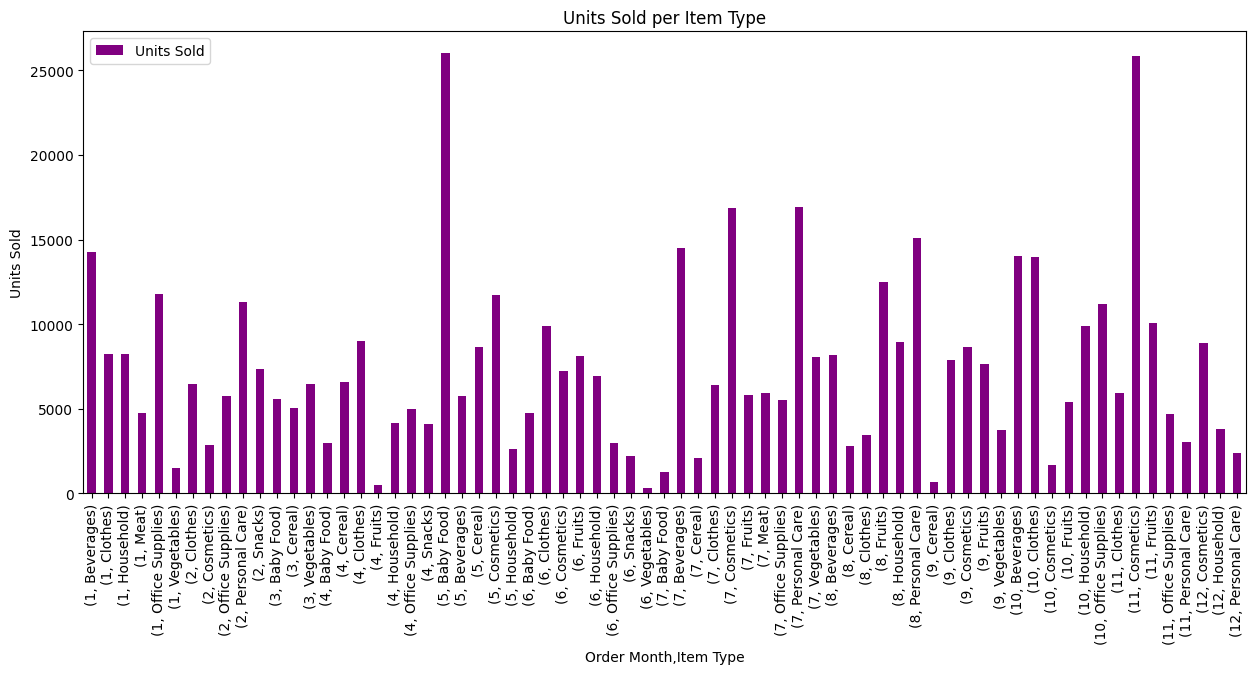

In [10]:
grp1.plot(kind='bar', title = 'Units Sold per Item Type', ylabel = 'Units Sold', figsize=(15, 6), color='purple')

In [11]:
grp2 = data.groupby(['Order Year'])[["Units Sold"]].sum()
grp2

,Units Sold
Order Year,
2010,61571
2011,54768
2012,97967
2013,64663
2014,92040
2015,49480
2016,43156
2017,49226


<AxesSubplot:title={'center':'Units Sold per Year'}, xlabel='Order Year', ylabel='Units Sold'>

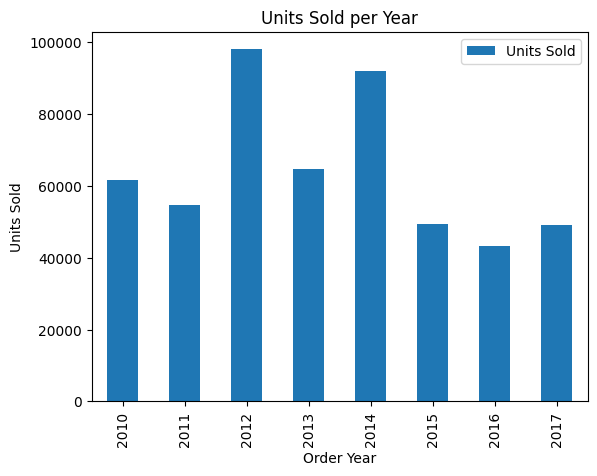

In [12]:
grp2.plot(kind='bar', title='Units Sold per Year', ylabel="Units Sold")

In [13]:

grp3 = data.groupby(["Order Month"])[["Units Sold"]].sum()
grp3.rename(index={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
grp3

,Units Sold
Order Month,
Jan,48794
Feb,33700
Mar,17041
Apr,32386
May,54745
Jun,42434
Jul,83395
Aug,50947
Sep,28596


<AxesSubplot:title={'center':'Units Sold per Month'}, xlabel='Order Month'>

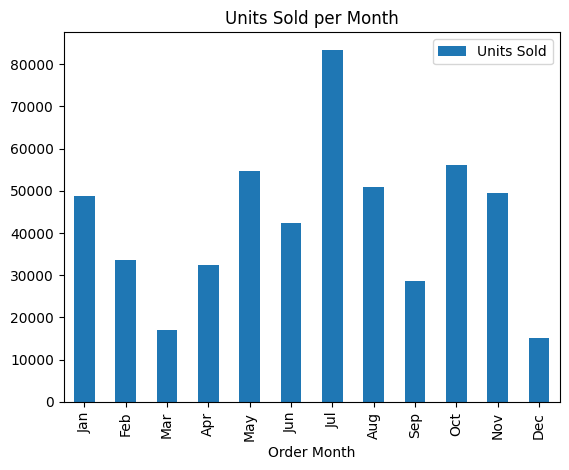

In [14]:
grp3.plot(kind='bar', title="Units Sold per Month")

In [15]:
grp4 = data.groupby(['Order Year'])[["Total Profit"]].sum()
grp4

,Total Profit
Order Year,
2010,6629567.43
2011,2741008.23
2012,9213010.12
2013,6715420.04
2014,5879461.68
2015,3996539.44
2016,4903838.01
2017,4089353.45


<AxesSubplot:title={'center':'Total Profit per Year'}, xlabel='Order Year', ylabel='Total Profit'>

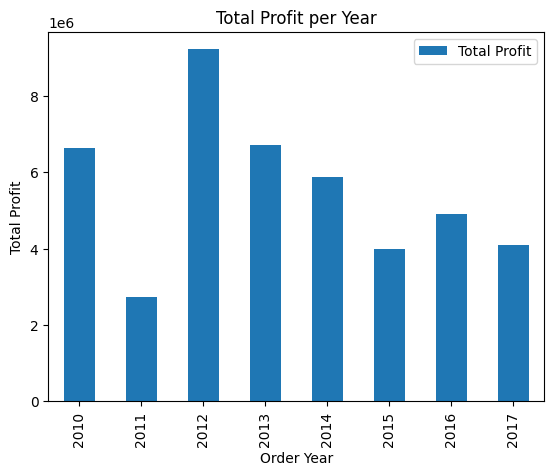

In [16]:
grp4.plot(kind='bar', title='Total Profit per Year', ylabel='Total Profit')

In [17]:
grp5 = data.groupby(['Order Month'])[["Total Profit"]].sum()
grp5.rename(index={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
grp5

,Total Profit
Order Month,
Jan,4049786.11
Feb,2383463.83
Mar,1385680.90
Apr,3084152.04
May,5823056.69
Jun,4128692.12
Jul,5921371.46
Aug,2526680.38
Sep,2399313.74


<AxesSubplot:title={'center':'Total Profit per Month'}, xlabel='Order Month', ylabel='Total Profit'>

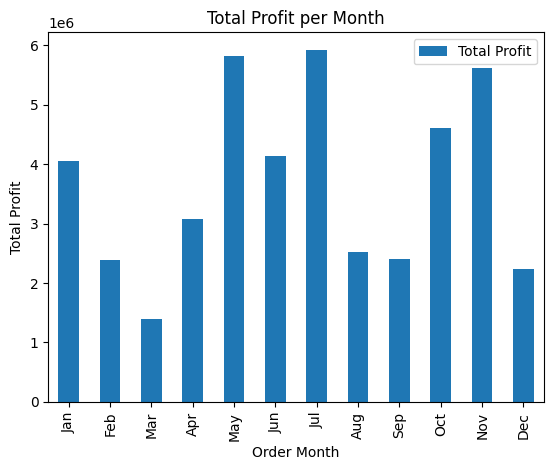

In [18]:
grp5.plot(kind='bar', title='Total Profit per Month', ylabel='Total Profit')

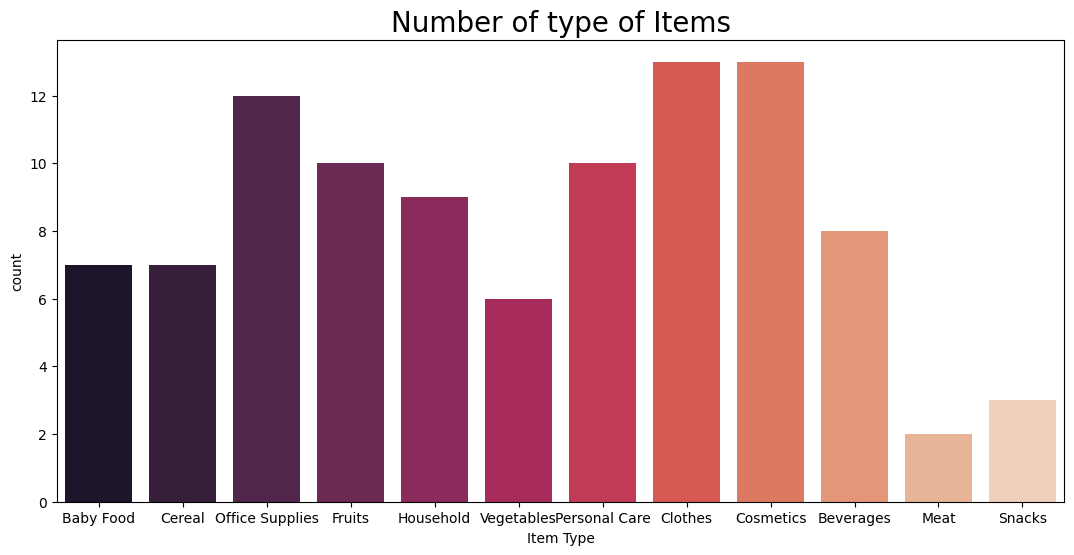

In [19]:
plt.figure(figsize = (13, 6))
sns.countplot(x = 'Item Type', data = data, palette='rocket')
plt.title("Number of type of Items", fontsize = 20)
plt.show()

In [20]:
grp6 = data.groupby(['Item Type'])[["Total Profit"]].sum()
grp6

,Total Profit
Item Type,
Baby Food,3886643.70
Beverages,888047.28
Cereal,2292443.43
Clothes,5233334.40
Cosmetics,14556048.66
Fruits,120495.18
Household,7412605.71
Meat,610610.00
Office Supplies,5929583.75


<AxesSubplot:title={'center':'Total Profit per Item Type'}, xlabel='Item Type', ylabel='Total Profit'>

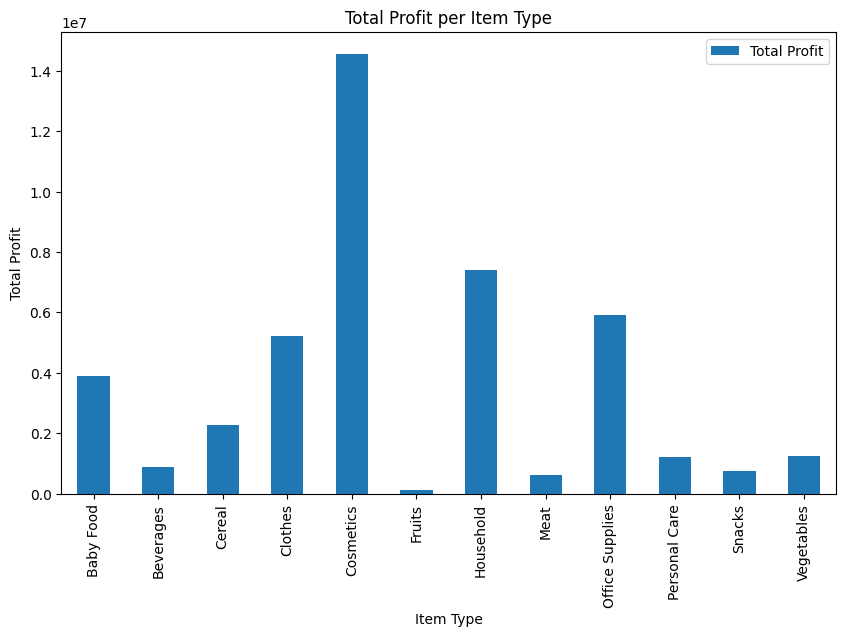

In [21]:
grp6.plot(kind='bar', title="Total Profit per Item Type", figsize=(10,6), ylabel='Total Profit')

In [22]:
grp7 = data.groupby(["Region"])[["Units Sold"]].sum().sort_values(by='Units Sold')

<AxesSubplot:title={'center':'Units Sold per Region'}, ylabel='Region'>

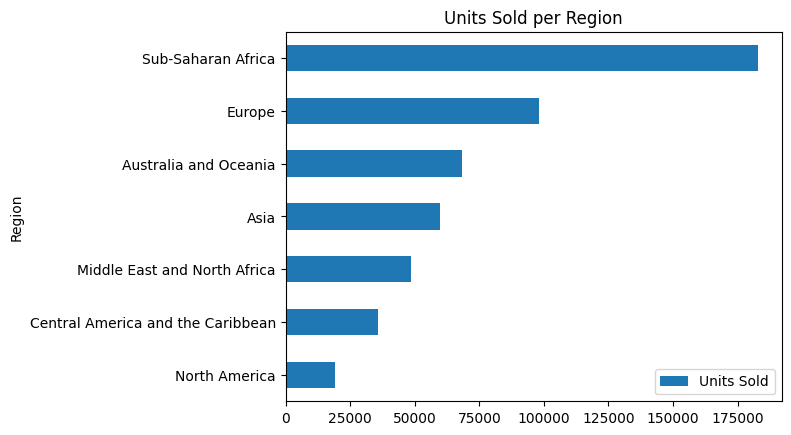

In [23]:
grp7.plot(kind='barh', title='Units Sold per Region', ylabel='Units Sold')

In [24]:
data['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

### Correlation Graph

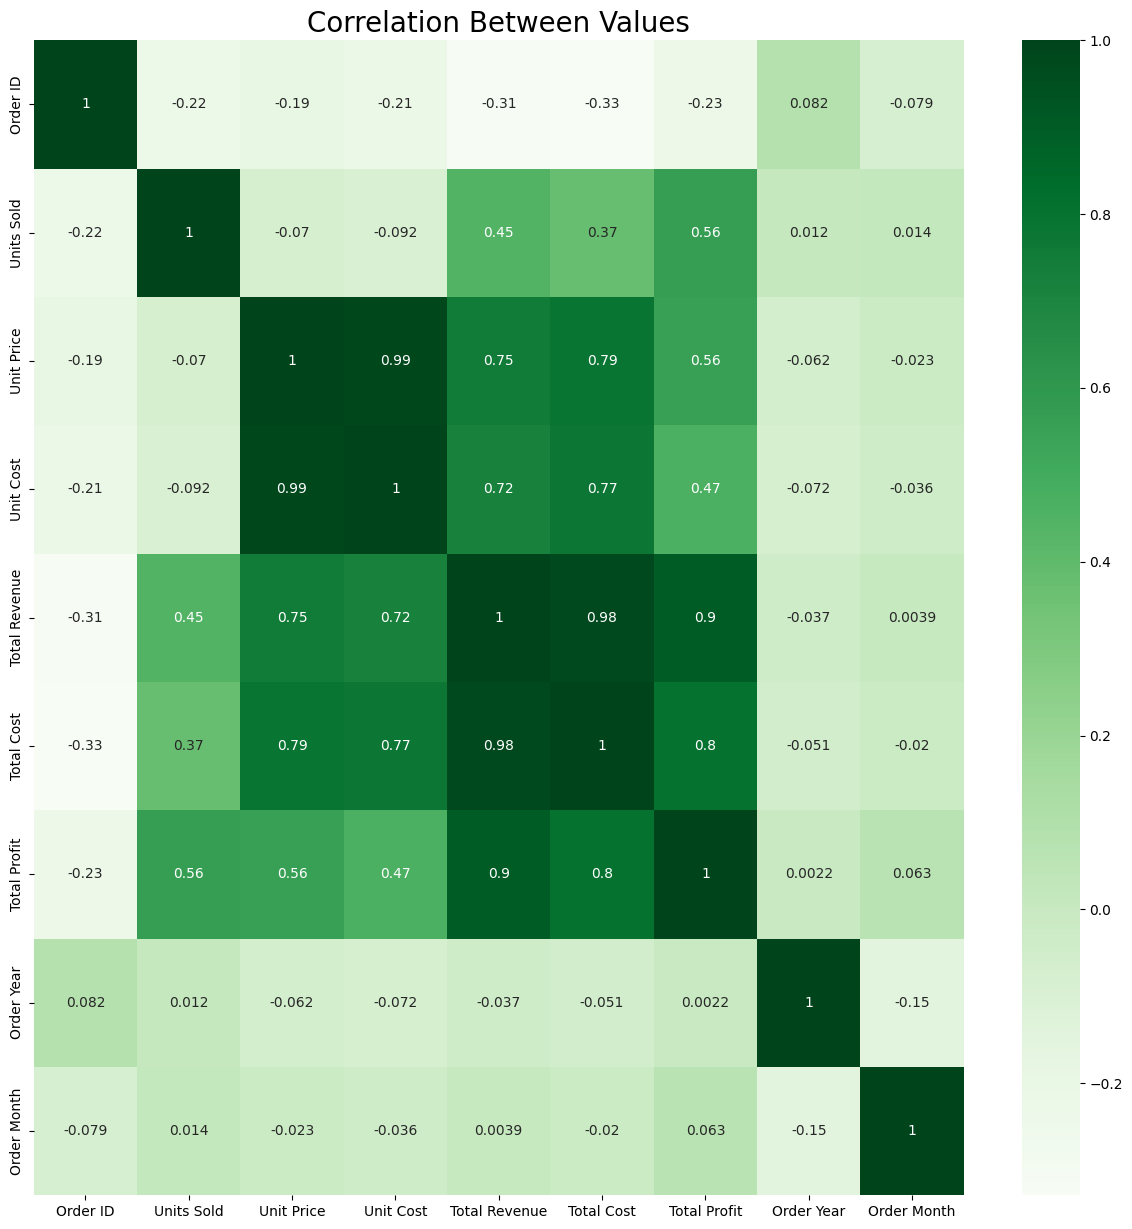

In [25]:
corr = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'Greens')
plt.title('Correlation Between Values',fontsize = 20)
plt.show()

In [26]:
# file = open("country Codes.txt", 'r')
# a = file.read()
# lst = a.split('\n')
# codes = {}

# for i in lst:
#     k = i.split('\t')
#     codes[k[0]] = k[1]

In [27]:
data.groupby(['Country'])[['Total Profit']].sum().sort_values(by='Total Profit', ascending=False)

,Total Profit
Country,
Djibouti,2425317.87
Myanmar,1802771.70
Pakistan,1719922.04
Samoa,1678540.98
Honduras,1609947.52
Iceland,1541705.29
Azerbaijan,1512926.83
Switzerland,1512729.45
Mexico,1457942.76


In [28]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,2
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,1


### Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
A = pd.concat([data["Units Sold"], data["Unit Cost"], data['Total Revenue']], axis=1)
B = data[['Total Profit']]
B = B.astype(int)
A

,Units Sold,Unit Cost,Total Revenue
0,9925,159.42,2533654.00
1,2804,117.11,576782.80
2,1779,524.96,1158502.59
3,8102,6.92,75591.66
4,5062,524.96,3296425.02
5,2974,159.42,759202.72
6,4187,502.54,2798046.49
7,8082,90.93,1245112.92
8,6070,56.67,496101.10
9,6593,117.11,1356180.10


In [31]:
chi2_selector = SelectKBest(chi2, k=2)
A_kbest = chi2_selector.fit_transform(A, B)
print(A_kbest)

print('Original number of features:', A.shape)
print('Reduced number of features:', A_kbest.shape)

[[9.92500000e+03 2.53365400e+06]
 [2.80400000e+03 5.76782800e+05]
 [1.77900000e+03 1.15850259e+06]
 [8.10200000e+03 7.55916600e+04]
 [5.06200000e+03 3.29642502e+06]
 [2.97400000e+03 7.59202720e+05]
 [4.18700000e+03 2.79804649e+06]
 [8.08200000e+03 1.24511292e+06]
 [6.07000000e+03 4.96101100e+05]
 [6.59300000e+03 1.35618010e+06]
 [1.24000000e+02 1.91034400e+04]
 [4.16800000e+03 4.55479040e+05]
 [8.26300000e+03 9.02980640e+05]
 [8.97400000e+03 5.99705498e+06]
 [4.90100000e+03 4.00558730e+05]
 [1.67300000e+03 1.82825440e+05]
 [6.95200000e+03 3.03941440e+06]
 [5.43000000e+03 2.57653500e+05]
 [3.83000000e+03 2.55947410e+06]
 [5.90800000e+03 2.49252612e+06]
 [7.45000000e+03 1.90183600e+06]
 [1.27300000e+03 3.24971440e+05]
 [2.22500000e+03 3.39490500e+05]
 [2.18700000e+03 2.04047100e+04]
 [5.07000000e+03 4.14371100e+05]
 [1.81500000e+03 7.93518000e+05]
 [5.39800000e+03 5.03633400e+04]
 [5.82200000e+03 5.43192600e+04]
 [5.12400000e+03 2.43133800e+05]
 [2.37000000e+03 1.58379990e+06]
 [8.661000

### Applying Machine Learning Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [45]:
X = pd.concat([data["Units Sold"], data["Total Revenue"]], axis=1)

Y = np.array(data['Total Profit'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [46]:
D = RandomForestRegressor(n_estimators=100, random_state=10)
D.fit(X_train, Y_train)


RandomForestRegressor(random_state=10)

In [47]:
D.score(X_test, Y_test)

0.9465711696252959